<a href="https://colab.research.google.com/github/Vilash/machineLearning/blob/main/treeBasedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier as VC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

sns.set()
sns.set_palette("Paired", 9)

# CART
**C**lassification **A**nd **R**egression **T**rees

Tree learns a sequence of if-else question about individual features



In [39]:
breastCancerFeatures = list(["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])
breastCancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None, names=breastCancerFeatures)

print(breastCancer.head())

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Mean Concave points')

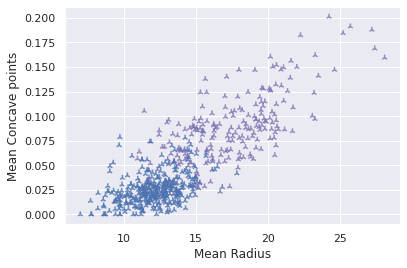

In [6]:
plt.scatter(breastCancer["radius_mean"],breastCancer["concave points_mean"], c=breastCancer["diagnosis"], alpha=0.8, marker="2")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Concave points")

In [35]:
X = breastCancer.drop("diagnosis",axis=1)
y = breastCancer["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

dt6 = DecisionTreeClassifier(max_depth=6, random_state=1)
dt2 = DecisionTreeClassifier(max_depth=2, random_state=1)

dt6.fit(X_train, y_train)
y_pred = dt6.predict(X_test)
print("DecisionTree_6 {}".format(accuracy_score(y_pred, y_test)))

dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)
print("DecisionTree_2 {}".format(accuracy_score(y_pred, y_test)))


DecisionTree_6 0.9298245614035088
DecisionTree_2 0.9035087719298246


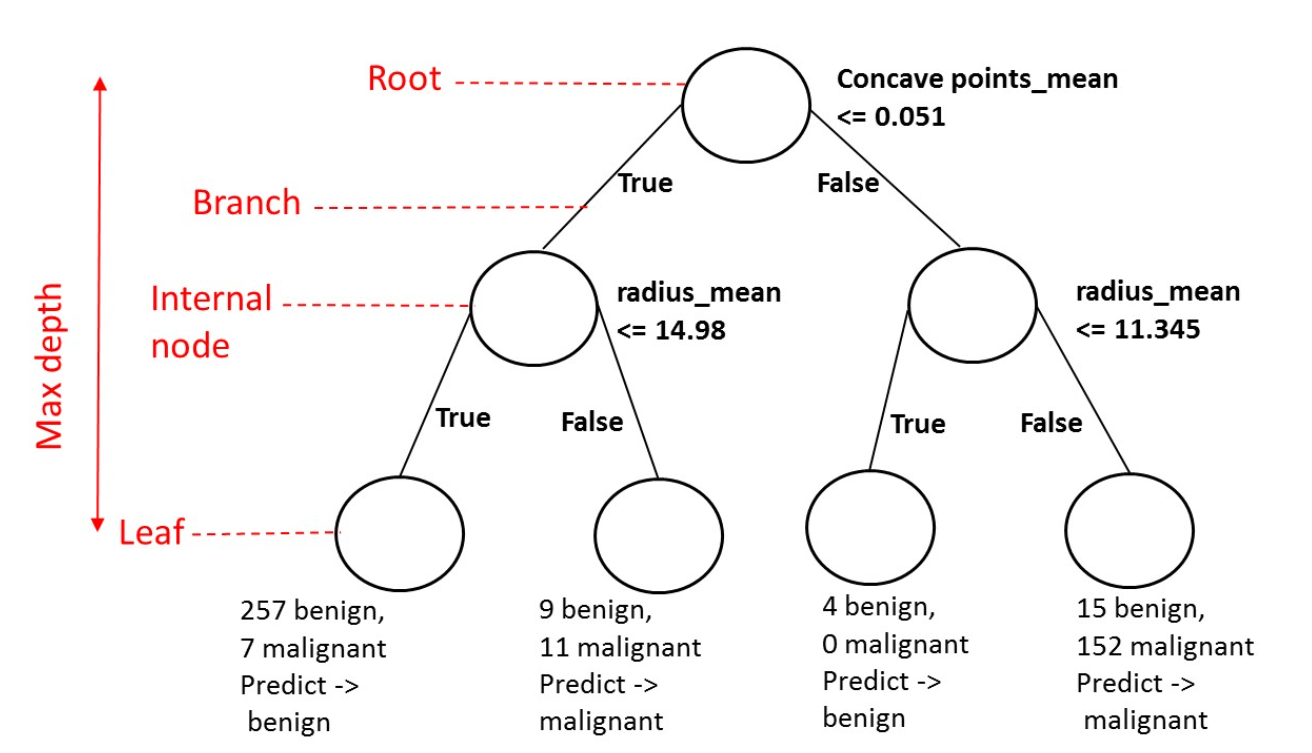

In [36]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion="gini" ,random_state=1)
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=1)

dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)
print("DecisionTree_Gini {}".format(accuracy_score(y_pred, y_test)))

dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
print("DecisionTree_Entropy {}".format(accuracy_score(y_pred, y_test)))

DecisionTree_Gini 0.9298245614035088
DecisionTree_Entropy 0.9385964912280702




---



---



# The Bias-Variance Trade-off

**Generalization Error**
: does *f_* generalize well on unseen data



```
f_ = bias^2 + variance + irreducible error
```
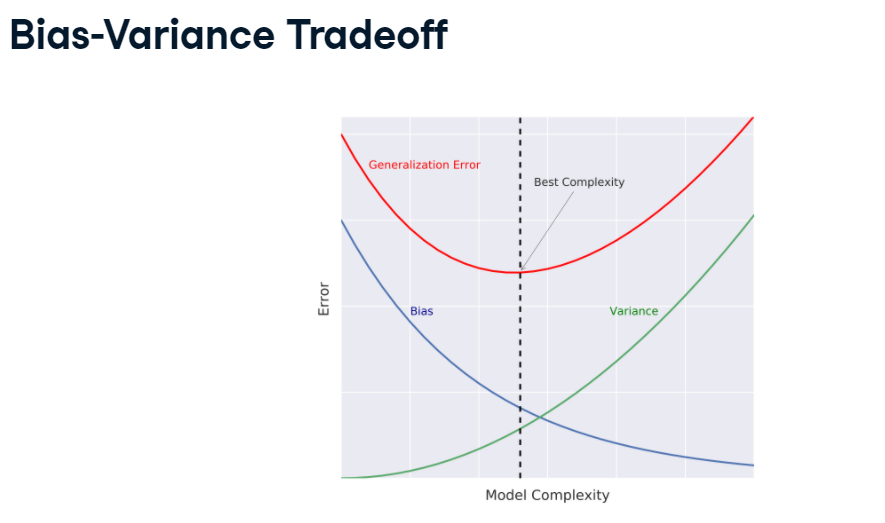

**Overfitting** : model fits noise as well
- low training error, high testing error

**Underfitting** : model cannot approximate *f* enough
- high training error, low testing error



**Diagnose bias & variance problem**
- split in train & test
- fit **f_** on training & evaluate on test
- test error = generalization error

- Cross Validation
 - K-fold CV
 - Hold out CV




Mean RMSE CV:4.28
Train RMSE: 3.67
Test RMSE: 4.23


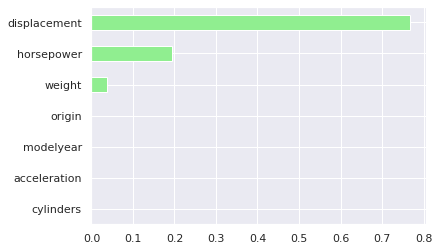

In [103]:
auto_mpg_features = list(["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","carname"])
auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, sep="\s+", names=auto_mpg_features, na_values="?")
# auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
auto_mpg.dropna(inplace=True)

X = auto_mpg.drop(columns=["mpg", "carname"])
y = auto_mpg["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=42)
# n_jobs = -1 employs all available CPU cores in computation
mse_cv = - cross_val_score(dt, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs = -1)

dt.fit(X_train, y_train)
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)
print("Mean RMSE CV:{:.2f}".format(mse_cv.mean()**(1/2)))
print("Train RMSE: {:.2f}".format(MSE(y_train, y_predict_train)**(1/2)))
print("Test RMSE: {:.2f}".format(MSE(y_test, y_predict_test)**(1/2)))

importances_dt = pd.Series(dt.feature_importances_, index=X.columns)

sorted_importances_dt = importances_dt.sort_values()

sorted_importances_dt.plot(kind='barh', color='lightgreen')

plt.show()

**Limitations of CART**
- Classification : produces only orthogonal decision boundaries
- Sensitive to small variations to training set
- High Variance: unconstrained CARTs may overfit the training set

**Solution: Ensemble Learning**
- Train different models on same training data
- Meta model: aggregate predictions of individual models
- Final prediction: more robust and less prone to errors

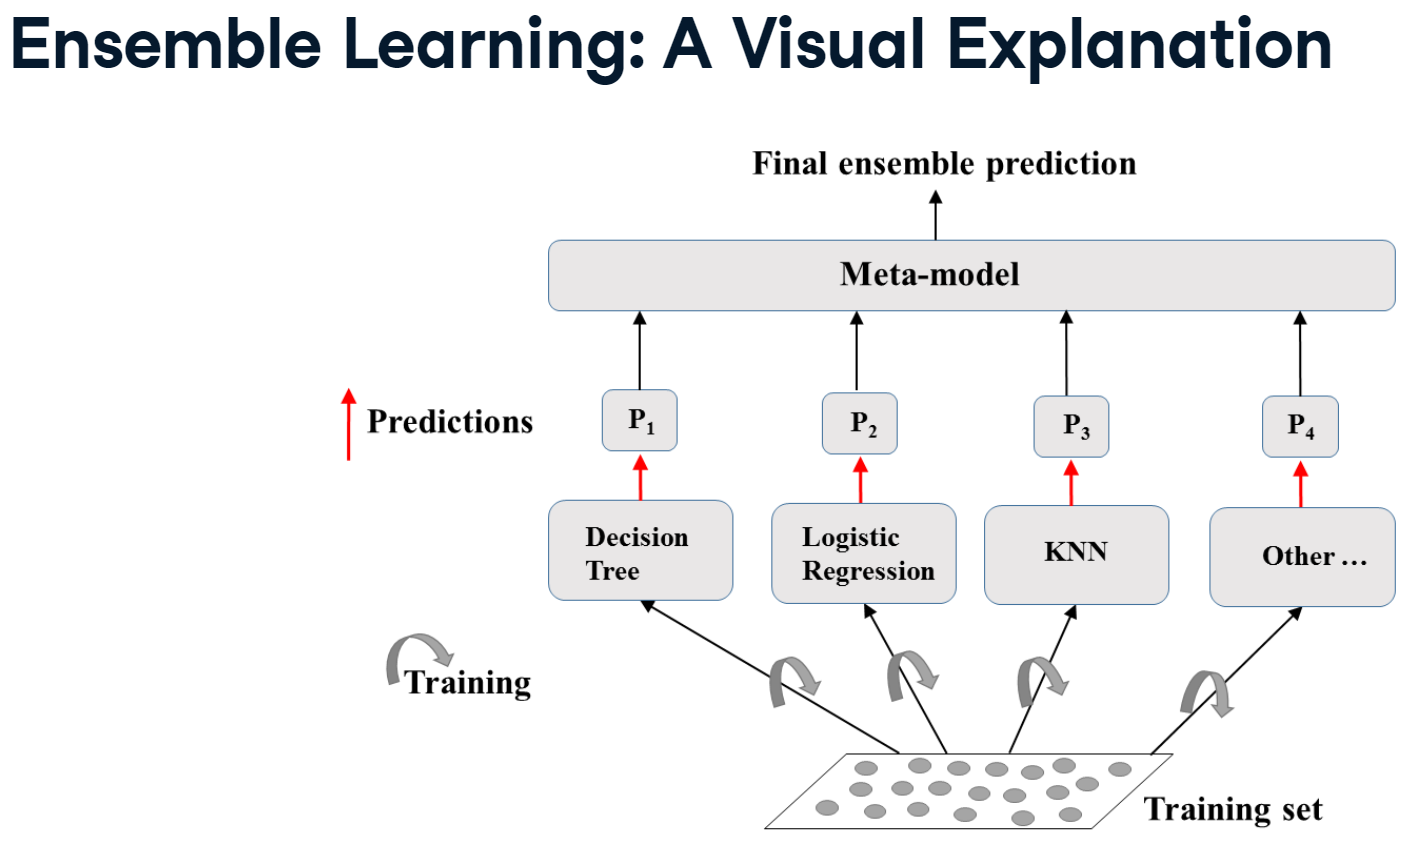




**Voting Classifier**

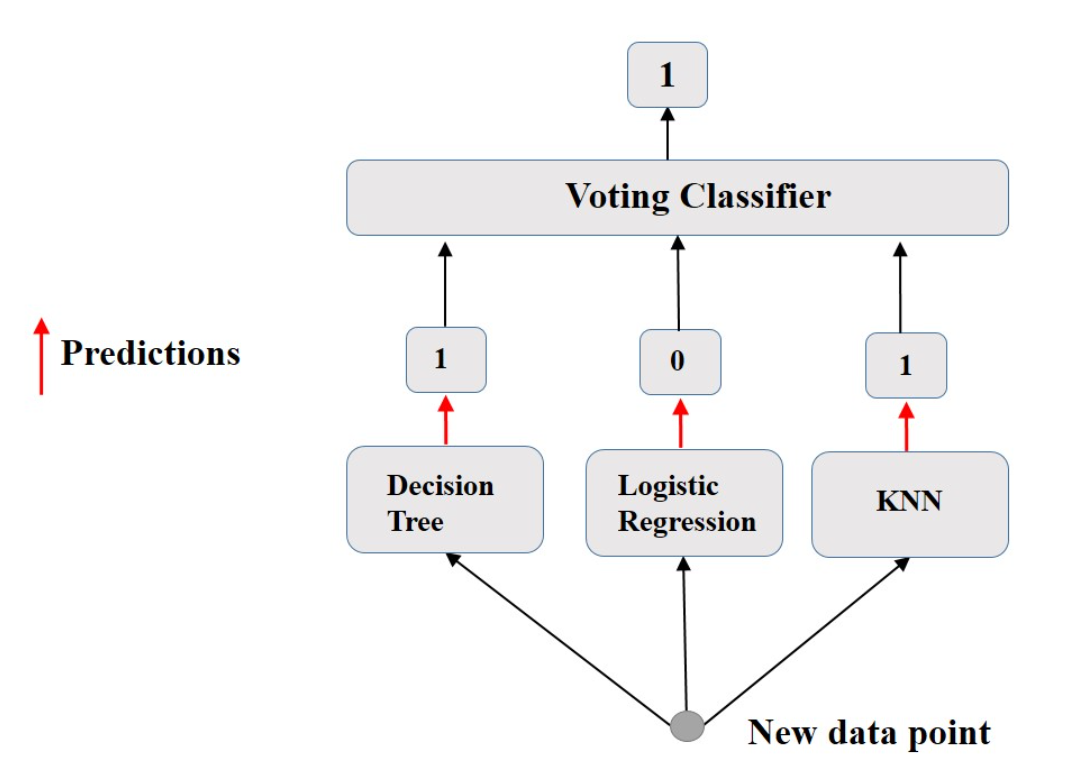

In [101]:
X = breastCancer.drop("diagnosis",axis=1)
y = breastCancer["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

lr = LogisticRegression(random_state=42)
knn = KNN()
dt = DecisionTreeClassifier(random_state=42)

classifiers = [("Logistic Regression", lr), ("K Nearest Neighbors", knn), ("Classification Tree", dt)]

for clf_name, clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_pred, y_test)))


vc = VC(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

print("Voting Classifier :{:.2f}".format(accuracy_score(y_pred_vc, y_test)))


Logistic Regression : 0.626
K Nearest Neighbors : 0.737
Classification Tree : 0.947
Voting Classifier :0.78


In [102]:
liverPatient = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv", header=None, )
print(liverPatient.head())

   0       1     2    3    4   5    6    7    8     9   10
0  65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90   1
1  62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74   1
2  62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89   1
3  58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00   1
4  72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40   1




---



---



# Bagging and Random Forest

**Bagging**: **B**ootstrap **Agg**regation
- Model is trained on different subsets of data

  - Classification: majority voting
  - Regressor: Average of predictions

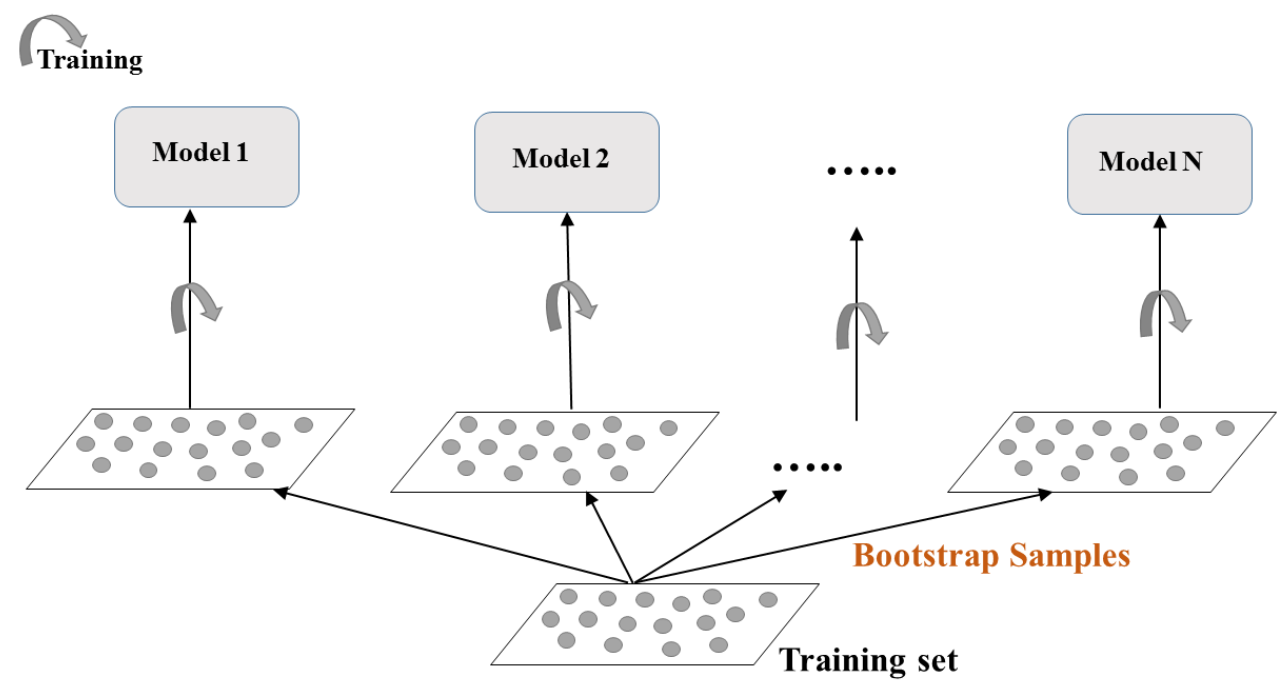


In [117]:
X = breastCancer.drop("diagnosis",axis=1)
y = breastCancer["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
# dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_pred, y_test)))




Bagging Classifier Accuracy: 0.94


**OOB Evaluation** : OOB instances are used to evaluate performance of model instead of CV

- On average 63% of training data is sampled
- Rest 37% are Out Of Bag instances

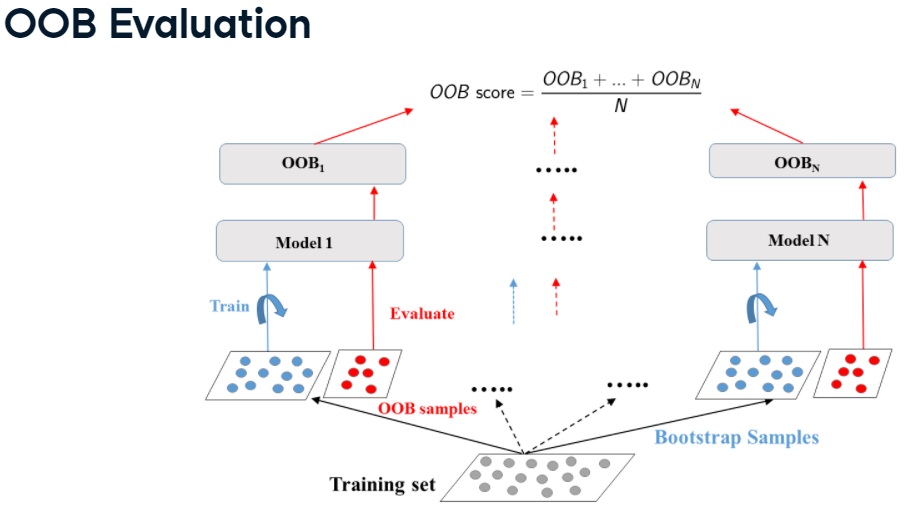

In [78]:
X = breastCancer.drop("diagnosis",axis=1)
y = breastCancer["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)
# dt = DecisionTreeClassifier(random_state=42)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1, oob_score=True)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print("Bagging Classifier Accuracy: {:.2f}".format(accuracy_score(y_pred, y_test)))
bc_oob_accuracy = bc.oob_score_
print("Out Of Bag Accuracy: {:.2f}".format(bc_oob_accuracy))

Bagging Classifier Accuracy: 0.94
Out Of Bag Accuracy: 0.93


**Random Forest**
- Base estimator is Decision Tree
- Trained on boostrap samples of same size as training set
- Introduces further randomization by sampling *d* features w/o replacement (*d* < all features)
- In general Random Forest has less variance  comared to Decision Tree

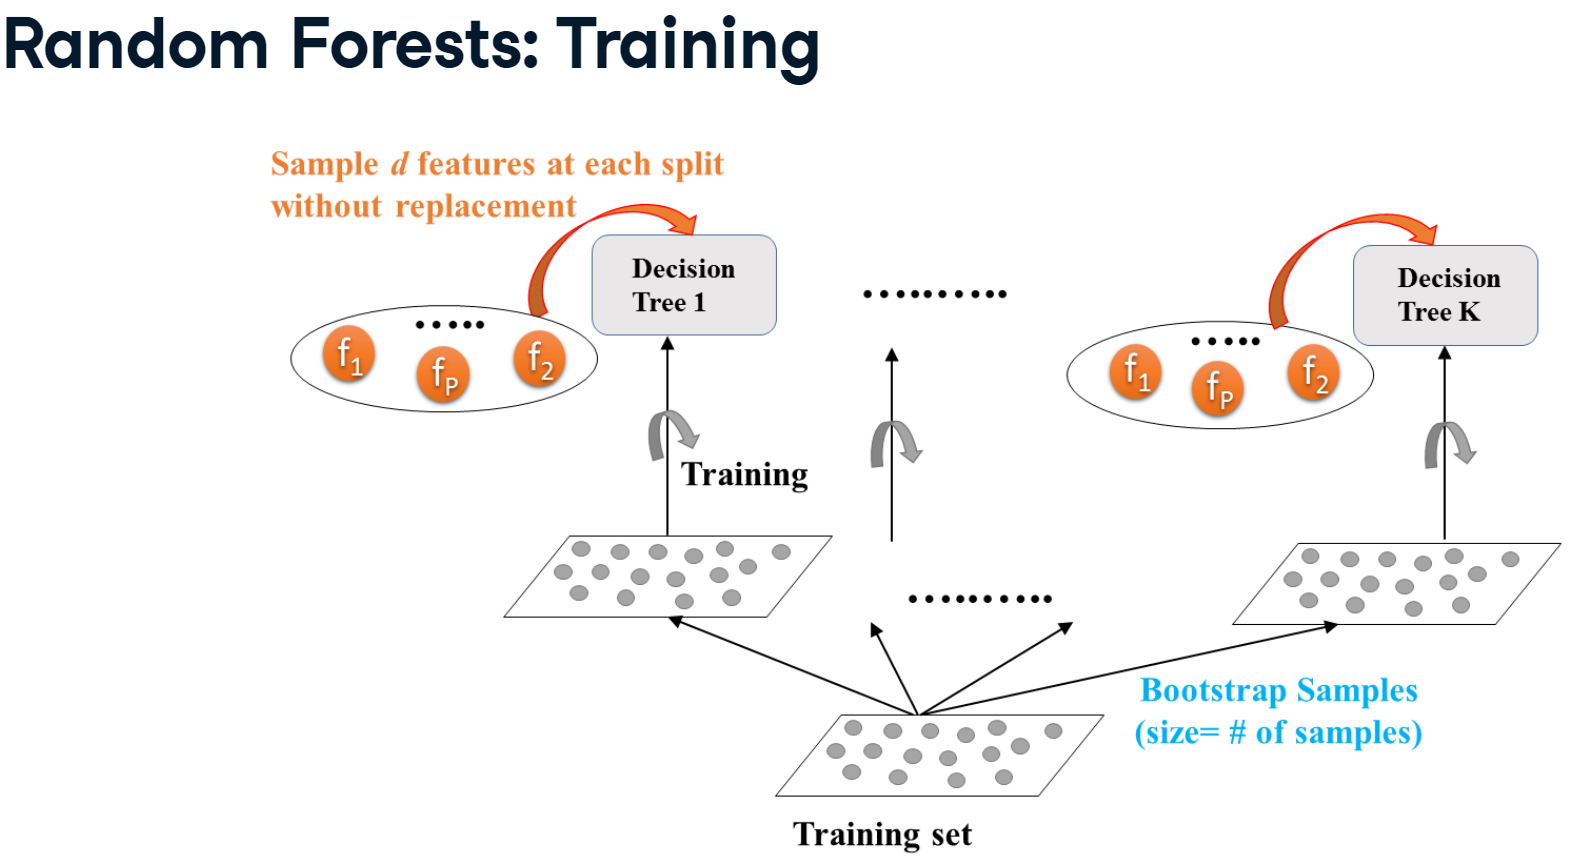


In [95]:
auto_mpg_features = list(["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","carname"])
auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, sep="\s+", names=auto_mpg_features, na_values="?")
# auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
auto_mpg.dropna(inplace=True)

X = auto_mpg.drop(columns=["mpg", "carname"])
y = auto_mpg["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=29, min_samples_leaf=0.12, random_state=42)
# n_jobs = -1 employs all available CPU cores in computation
# mse_cv = - cross_val_score(rf, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs = -1)

rf.fit(X_train, y_train)
# y_predict_train = dt.predict(X_train)
y_predict_test = rf.predict(X_test)

rmse_test = MSE(y_test, y_predict_test)**(1/2)
print("Test Set Random Forest Regressor RMSE:{:.3f}".format(rmse_test))

Test Set Random Forest Regressor RMSE:3.746


**Feature Importance:**

- Tree based methods enable us to measure importance of each feature in prediction
- accessed using `feature_importance_`

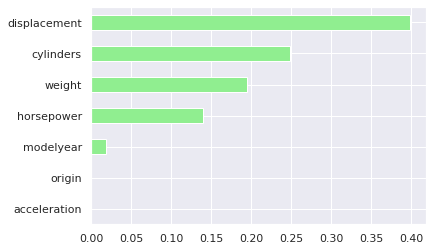

In [98]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='lightgreen')

plt.show()

Test set RMSE of rf: 51.09


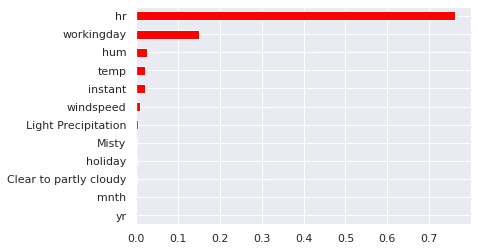

In [116]:
bike_share = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv")


X = bike_share.drop("cnt", axis=1)
y = bike_share["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

importance_features = pd.Series(rf.feature_importances_, index=X.columns)

importance_features.sort_values().plot(kind="barh", color='red')
plt.show()



---



---



# Boosting

- Ensemble technique where models involved learn from errors of it's predecessors
- Weak learner combine to form a strong learner

- **AdaBoost: Adaptive Boosting**
  - wrong predictions made by predecessors are updated
  - achieved by updating weights of training instances
  - each predictor is assigned *alpha*
  - *alpha* depends on training error 
- Gradient Boosting
  - has track record of winning many ML comp.
  - sequential correction of predecessor's errors 




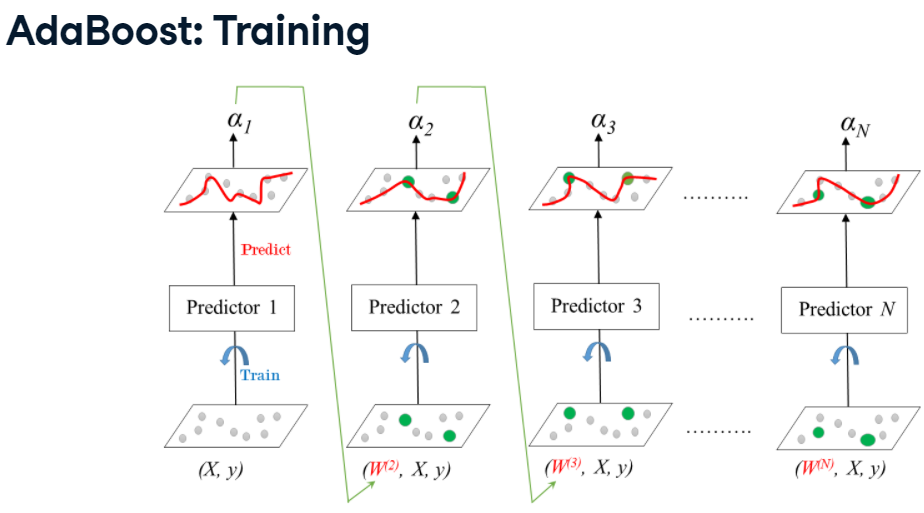

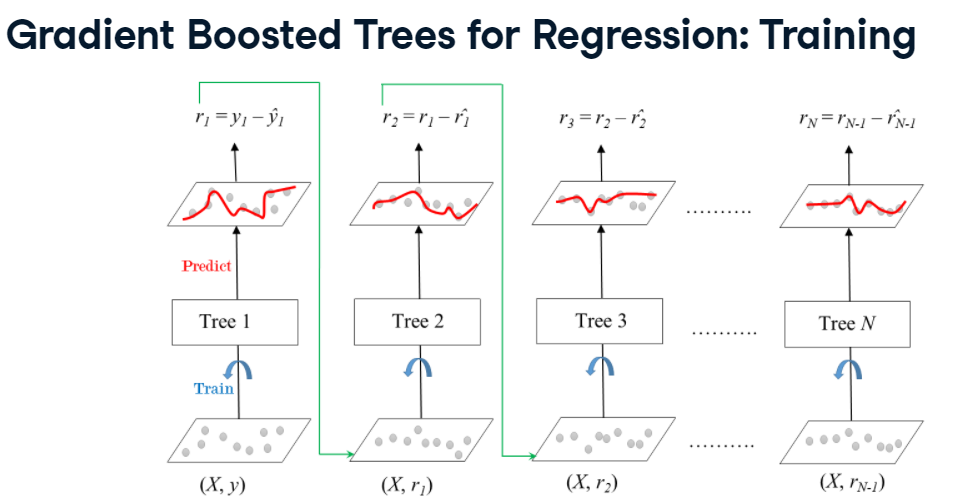

In [122]:
X = breastCancer.drop("diagnosis",axis=1)
y = breastCancer["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
# dt = DecisionTreeClassifier(random_state=42)
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

ab.fit(X_train, y_train)

y_pred_proba = ab.predict_proba(X_test)[:,1]
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred_proba)))

y_pred = ab.predict(X_test)
print("AdaBoost Classifier Accuracy: {:.2f}".format(accuracy_score(y_pred, y_test)))
# bc_oob_accuracy = ab.oob_score_
# print("Out Of Bag Accuracy: {:.2f}".format(bc_oob_accuracy))

ROC AUC Score: 0.984
AdaBoost Classifier Accuracy: 0.94


In [151]:
auto_mpg_features = list(["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","carname"])
auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, sep="\s+", names=auto_mpg_features, na_values="?")
# auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
auto_mpg.dropna(inplace=True)

X = auto_mpg.drop(columns=["mpg", "carname"])
y = auto_mpg["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
# n_jobs = -1 employs all available CPU cores in computation
# mse_cv = - cross_val_score(rf, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs = -1)

gb.fit(X_train, y_train)
# y_predict_train = dt.predict(X_train)
y_predict_test = gb.predict(X_test)

rmse_test = MSE(y_test, y_predict_test)**(1/2)
print("Test Set Gradient Boosting Regressor RMSE:{:.3f}".format(rmse_test))

Test Set Gradient Boosting Regressor RMSE:3.168


**Stochastic Gradient Boosting**
- exhaustive search 
- may lead to same splits and features used for trees
- each tree is trained on random samples w/o replacement 

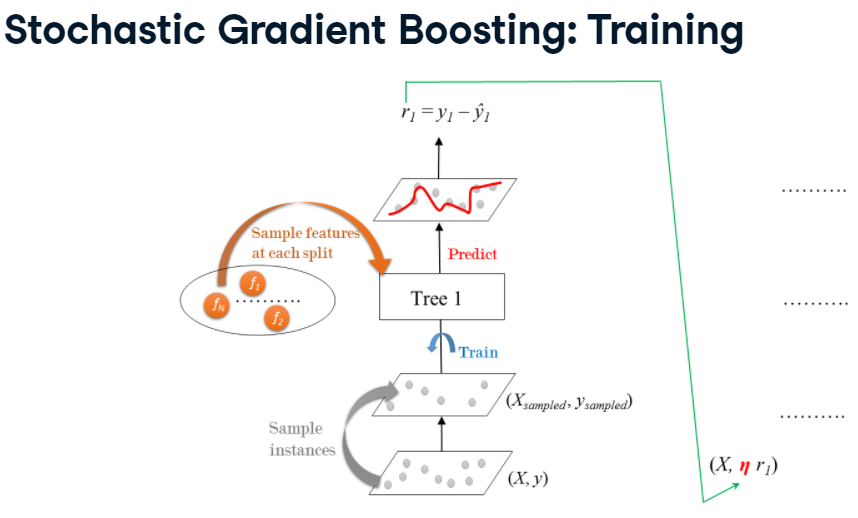

In [154]:
sgb = GradientBoostingRegressor(n_estimators=100, max_depth=1, random_state=42, subsample=0.8, max_features=0.2)
# n_jobs = -1 employs all available CPU cores in computation
# mse_cv = - cross_val_score(rf, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs = -1)

sgb.fit(X_train, y_train)
# y_predict_train = dt.predict(X_train)
y_predict_test = sgb.predict(X_test)

rmse_test = MSE(y_test, y_predict_test)**(1/2)
print("Test Set Gradient Boosting Regressor RMSE:{:.3f}".format(rmse_test))

Test Set Gradient Boosting Regressor RMSE:3.035




---



---



# Model Tuning

- hyperparameters are **tuned**
- parameters are **learned**
- GridSearch suffers from **curse of dimensionality** i.e. more features lead to longer time to converge

In [161]:
auto_mpg_features = list(["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","carname"])
auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, sep="\s+", names=auto_mpg_features, na_values="?")
# auto_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
auto_mpg.dropna(inplace=True)

X = auto_mpg.drop(columns=["mpg", "carname"])
y = auto_mpg["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(random_state=42)
params_rf = {
            'n_estimators': [300, 400, 500],
            'max_depth': [4,6,8],
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']
             }
gridrf = GridSearchCV(estimator=rf,
             param_grid=params_rf,
             scoring='neg_mean_squared_error',
             verbose=1,
             n_jobs=-1,
             cv=3)

gridrf.fit(X_train, y_train)

bestparams = gridrf.best_params_

print("Best Params:\n", bestparams)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   47.8s finished


Best Params:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}
